In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Lee el archivo CSV usando pandas
df = pd.read_csv('Ic1_punta50R[1].csv', delimiter=',')

# Extrae los valores de las columnas X y CH3
x_values = df['X'].tolist()
ch3_values = df['CH3'].tolist()

# Imprime los valores de X y CH3
print("Valores de X:", x_values)
print("Valores de CH3:", ch3_values)



Valores de X: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 

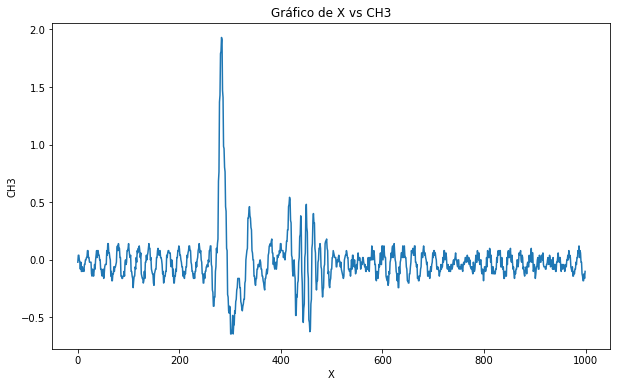

In [ ]:
# Crea la gráfica
plt.figure(figsize=(10, 6))  # Ancho: 10 pulgadas, Alto: 6 pulgadas

plt.plot(x_values, ch3_values)
plt.xlabel('X')
plt.ylabel('CH3')
plt.title('Gráfico de X vs CH3')

# Muestra la gráfica
plt.show()

In [ ]:
from scipy.signal import savgol_filter as savgol


In [ ]:
# Aplica el filtro Savitzky-Golay
window_length = 23  # Longitud de la ventana del filtro
polyorder =7  # Orden del polinomio para el ajuste
ch3_smoothed = savgol(ch3_values, window_length, polyorder)


[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True

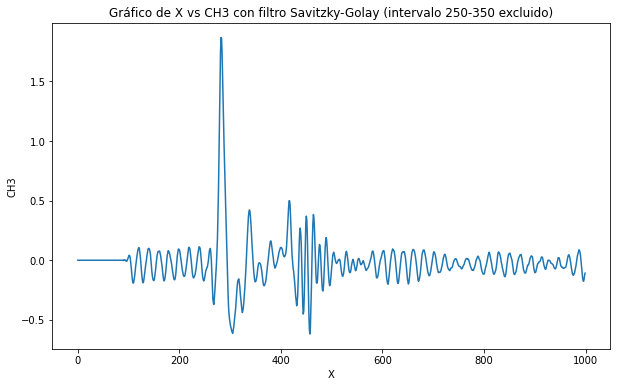

In [ ]:


# Crea una máscara para indicar qué puntos excluir del filtro
mask = [(x >100 ) for x in x_values]
print(mask)
# Aplica el filtro solo a los puntos que no están en el intervalo de 250 a 350
ch3_smoothed = savgol([ch3_values[i] if mask[i] else 0 for i in range(len(ch3_values))], window_length, polyorder)

# Crea la gráfica
plt.figure(figsize=(10, 6))  # Ancho: 10 pulgadas, Alto: 6 pulgadas

plt.plot(x_values, ch3_smoothed)
plt.xlabel('X')
plt.ylabel('CH3')
plt.title('Gráfico de X vs CH3 con filtro Savitzky-Golay (intervalo 250-350 excluido)')

# Muestra la gráfica
plt.show()

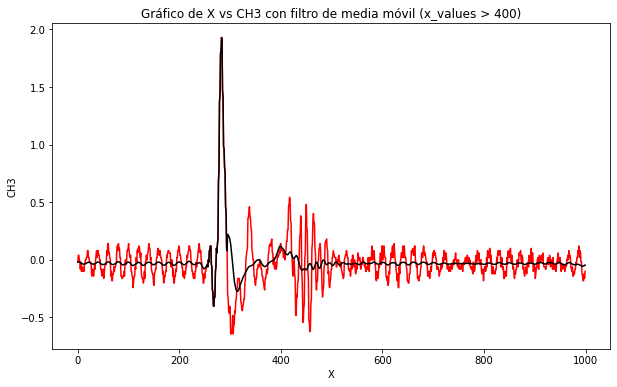

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Lee el archivo CSV usando pandas
df = pd.read_csv('Ic1_punta50R[1].csv', delimiter=',')

# Extrae los valores de las columnas X y CH3
x_values = df['X'].tolist()
ch3_values = df['CH3'].tolist()

# Aplica el filtro de media móvil a los valores de CH3 para x_values mayores a 400
window_size = 45  # Tamaño de la ventana del filtro

ch3_filtered = np.array(ch3_values)  # Convierte a array para facilitar el filtrado

# Obtiene los índices de los puntos correspondientes a x_values mayores a 400
filtered_indices = [i for i, x in enumerate(x_values) if x > 294 or x < 255]

# Aplica el filtro solo a los puntos correspondientes a x_values mayores a 400
for i in filtered_indices:
    start = max(0, i - (window_size // 2))
    end = min(i + (window_size // 2) + 1, len(ch3_values))
    ch3_filtered[i] = np.mean(ch3_values[start:end])

# Crea la gráfica
plt.figure(figsize=(10, 6))  # Ancho: 10 pulgadas, Alto: 6 pulgadas
plt.plot(x_values,ch3_values,color='r')
plt.plot(x_values, ch3_filtered, color='black')
plt.xlabel('X')
plt.ylabel('CH3')
plt.title('Gráfico de X vs CH3 con filtro de media móvil (x_values > 400)')

# Muestra la gráfica
plt.show()

In [ ]:
# Crea un nuevo DataFrame con los valores filtrados
df_filtered = pd.DataFrame({'X': x_values, 'CH3_filtered': ch3_filtered})

# Guarda los valores filtrados en un archivo CSV
df_filtered.to_csv('ch3_filtered.csv', index=False)